# UCLA Extension Data Science Certificate - Final Exam

## Proposal
Prepare a proposal in which you describe work to be done in analysis of the following dataset: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


## Domain Background
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. 

From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. 

With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. 

Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.

#### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Get the Data

In [2]:
credit_card = pd.read_excel('..\data\\default of credit card clients.xls',header= 1)

In [3]:
credit_card.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable.

There are 25 variables:
- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

default.payment.next.month is the target variable.

## Problem Statement

In the given problem we need to classify client based on 23 variables / attributes provided to predict if a client will be a defaulter in payment next month.
Using EDA & close look at the data we will analyse the features which will have impact on target variable.
Since this is a clearly defined problem & Discrete target we can use use classification models to predict if a client will default or not.

Classification models include linear models like Logistic Regression, SVM, and nonlinear ones like K-NN, Kernel SVM and Random Forests.

Machine Learning Classification models:
1. Logistic Regression
2. K-Nearest Neighbors K-NN
3. Support Vector Machine (SVM)
4. Kernel SVM
5. Naive Bayes
6. Decision Tree Classification
7. Random Forest Classification

## Metrics

Classification performance can be measured using metrics such as Log-Loss, Accuracy, AUC(Area under Curve) etc.
1. Confusion Matrix
2. Accuracy - is the number of correct predictions made by the model over all kinds predictions made. (True Positive & True Negative) (TP+TN)/(TP+TN+FP+FN)
3. Precision - Precision is a measure that tells us what proportion of client that we predicted to defaulter, actually are defaulter.
4. Recall or Sensitivity - Recall is a measure that tells us what proportion of client that actually are defaulter was predicted by the algorithm as defaulter.
5. F1 Score - Single score that kind of represents both Precision(P) and Recall(R)


## Data Exploration
The Data provide to us as a CSV file has 25 attributes with 23 attributes features & 1 target.
All attributes are numerical features with each attribute having 30K record. This dataset is clean without any missing value.
There are no categorical variables since all categorical variable are already converted to numeric data (e.g Sex, Education, Martial Status etc)



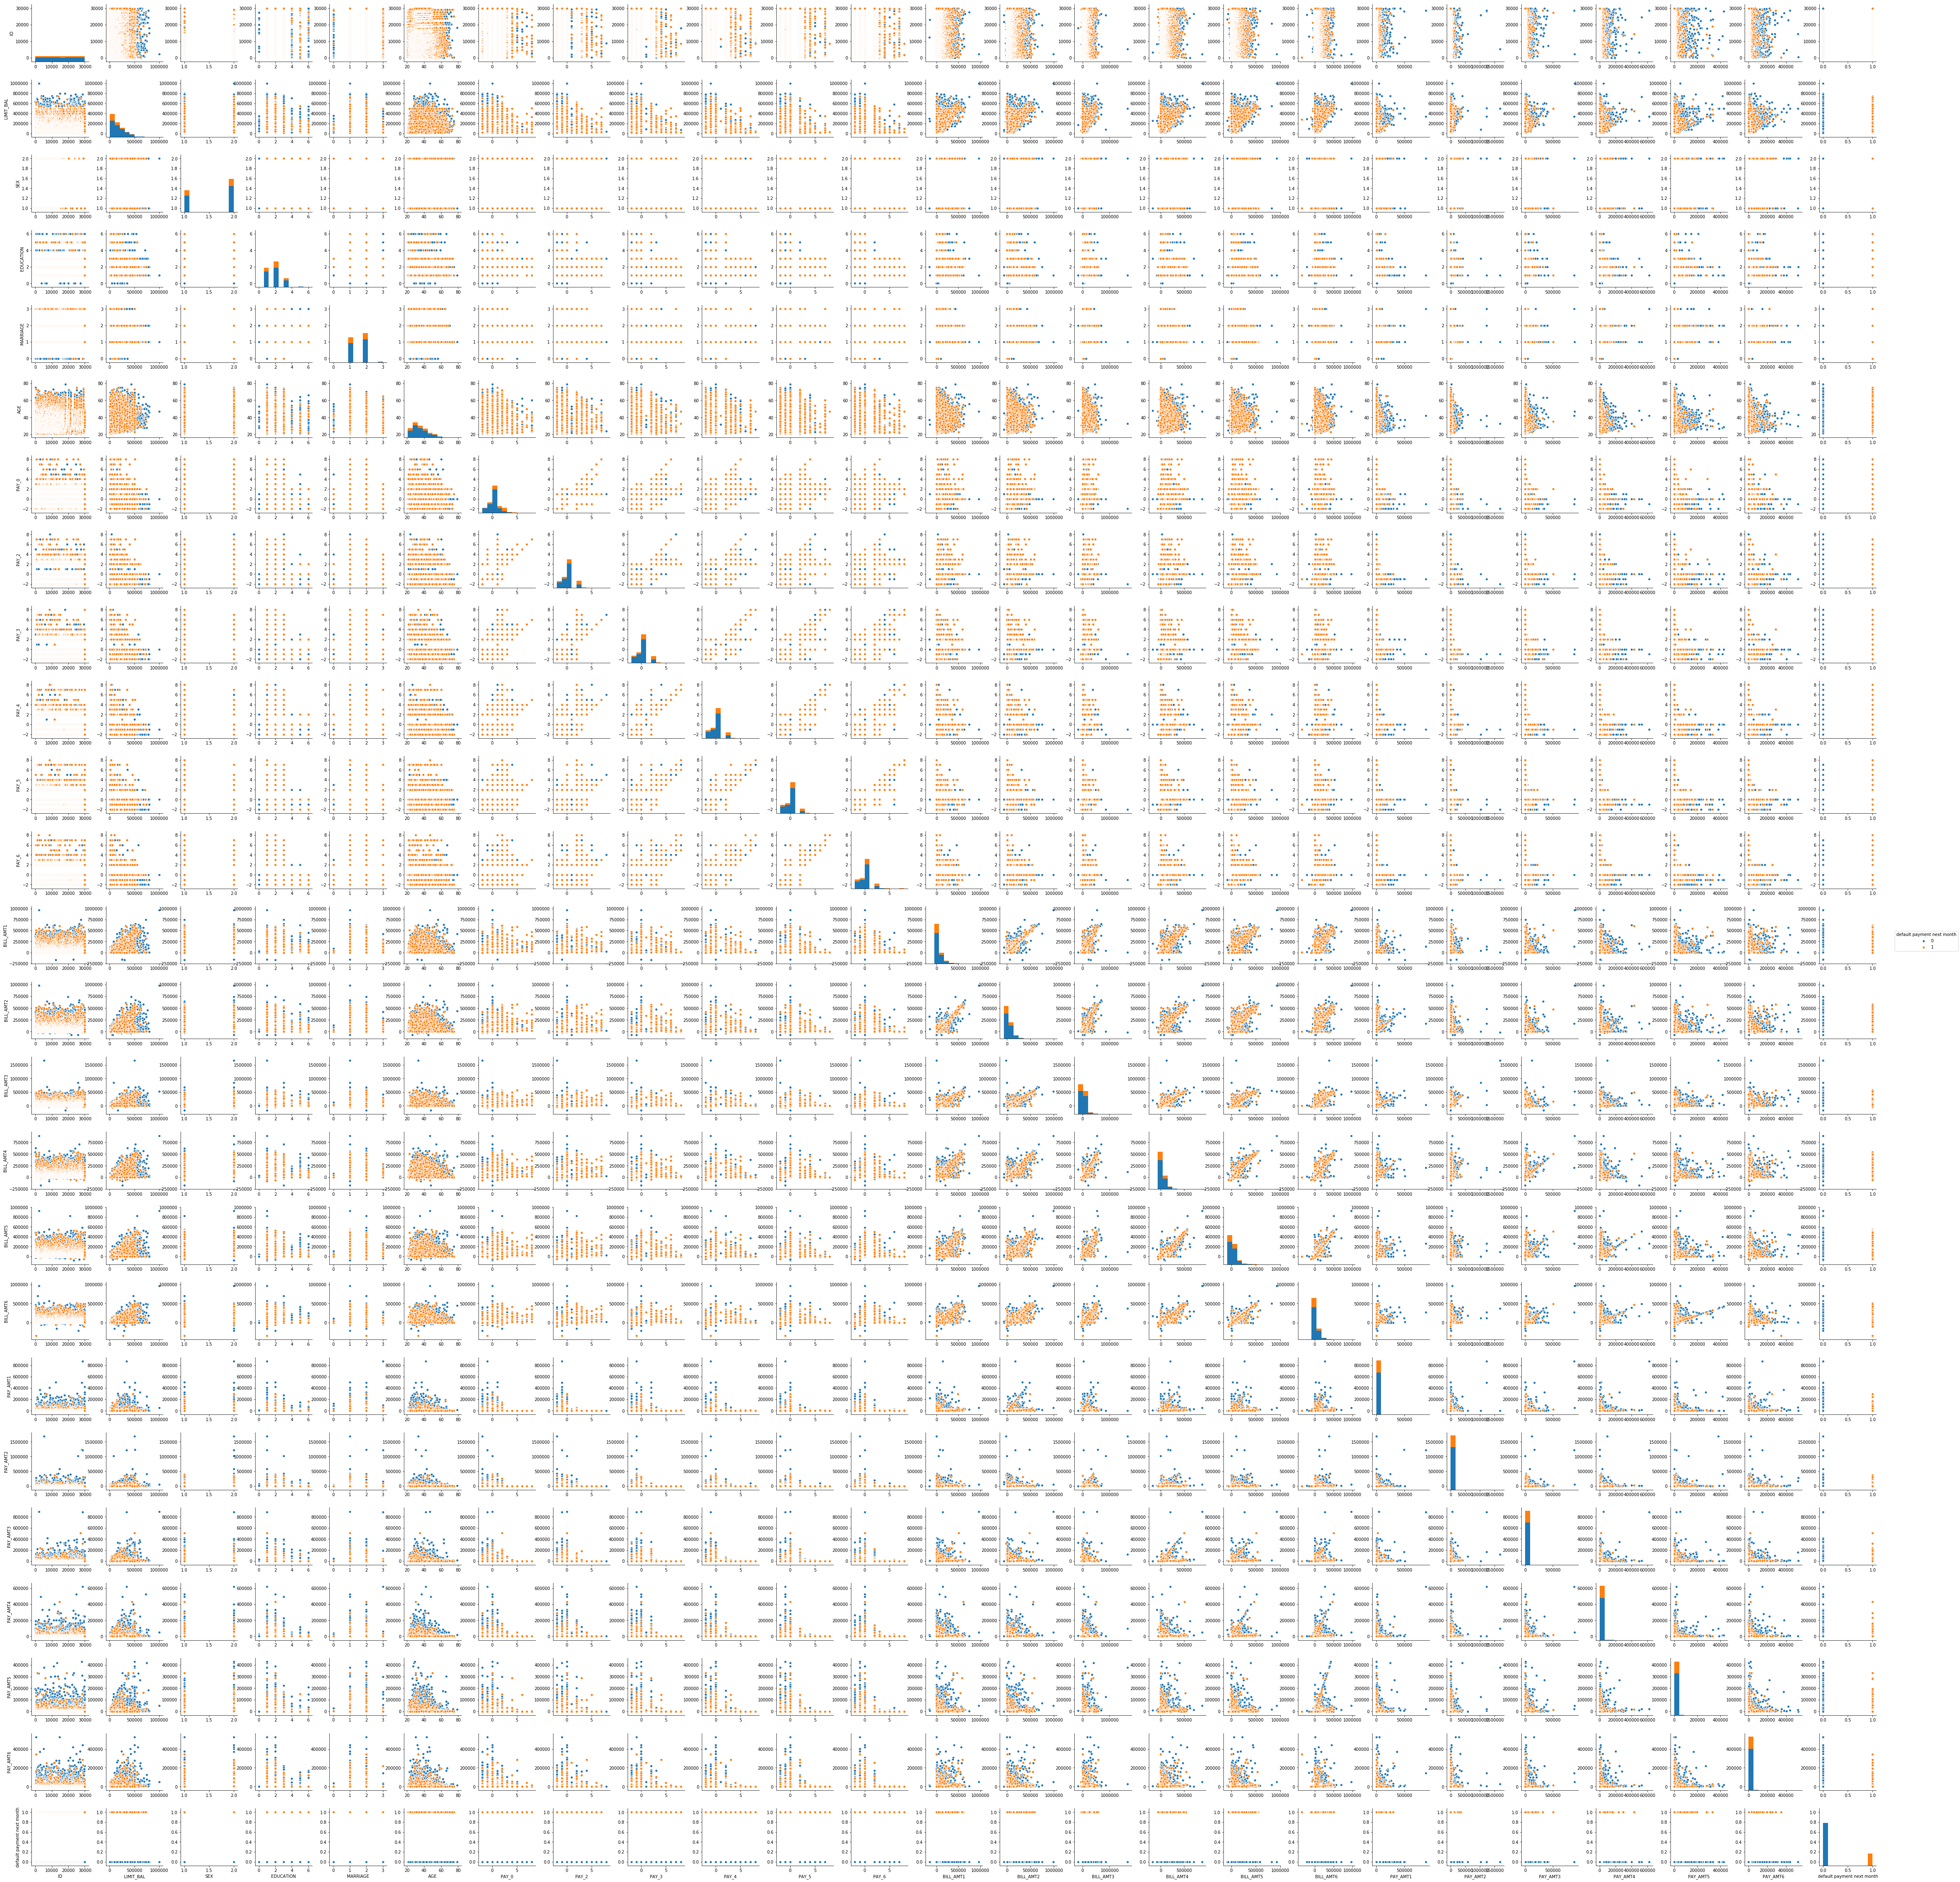

In [4]:
sns.pairplot(credit_card, hue='default payment next month')

In [5]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [6]:
credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## Exploratory Visualization

We have carried out several EDA to find out the data correlation & extract relevant characteristic or feature about the data.
Below plot between LimitBalance & Sex shows that number of female are more & have higher limit balance.
Plot below that vizualises Education with Default Payment next month, which clearly shows that higher the education less likelyhood of default in payment.
The KDE plot below shows the more concentration of client are of Age around 20-25 & people with Age around 30 to 35 have higher limit balance. As age increase beyond 40 balance reduces.
The correlation plot shows high corre;lation of Billamounts and also high correlationship amoung Pay.

#### Used Tableau to create Visualization
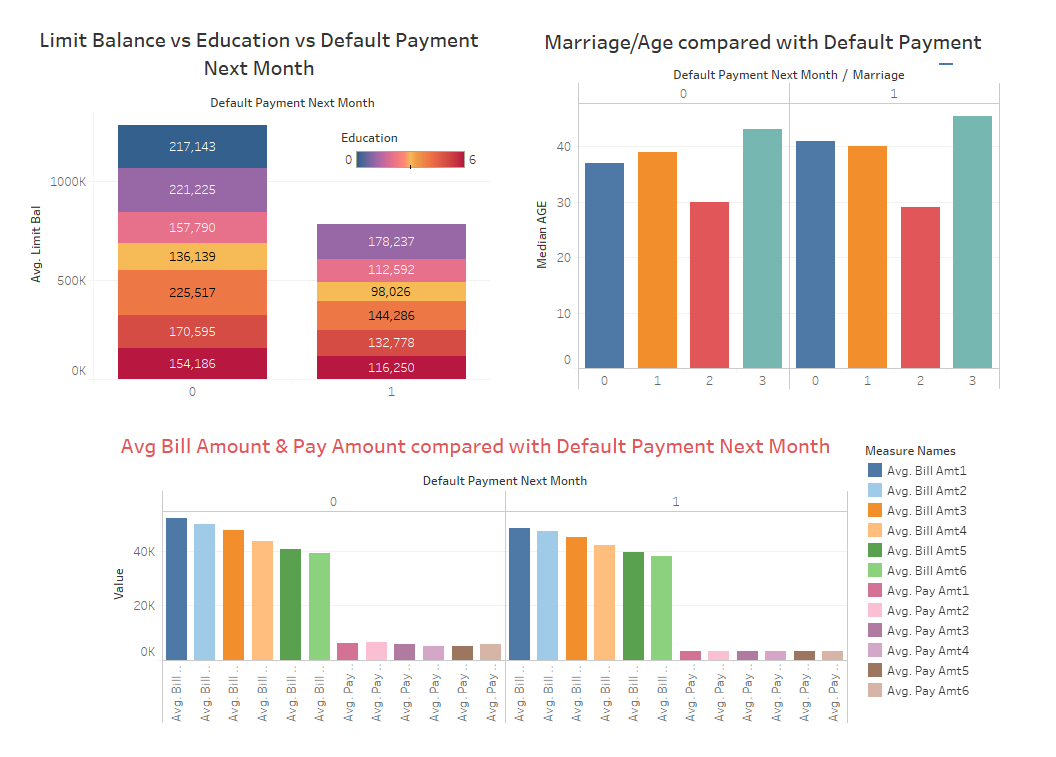

Text(0.5,0,'LIMIT_BAL')

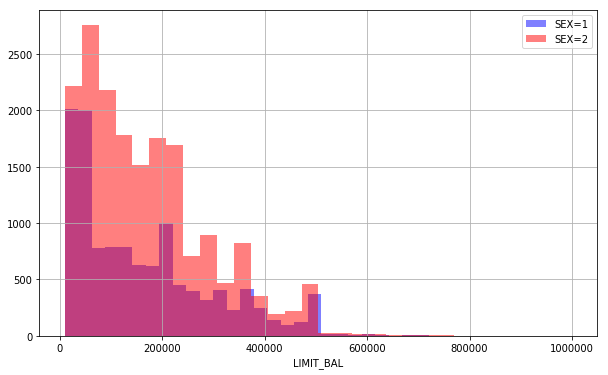

In [7]:
plt.figure(figsize=(10,6))
credit_card[credit_card['SEX']==1]['LIMIT_BAL'].hist(alpha=0.5,color='blue',
                                              bins=30,label='SEX=1')
credit_card[credit_card['SEX']==2]['LIMIT_BAL'].hist(alpha=0.5,color='red',
                                              bins=30,label='SEX=2')
plt.legend()
plt.xlabel('LIMIT_BAL')

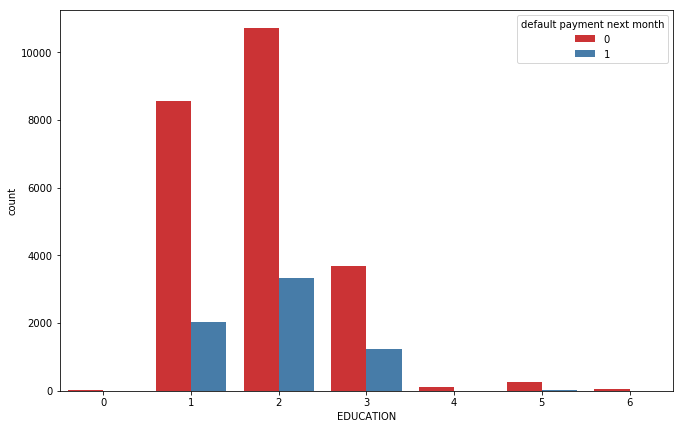

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x='EDUCATION',hue='default payment next month',data=credit_card,palette='Set1')

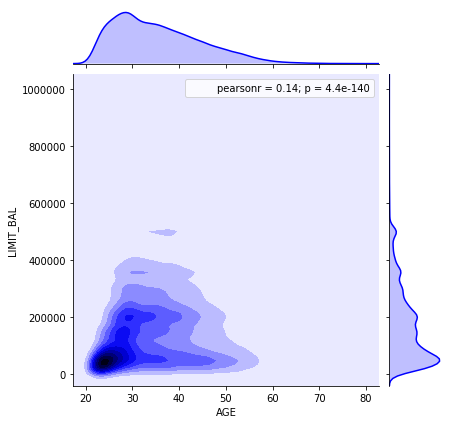

In [9]:
sns.jointplot(y='LIMIT_BAL',x='AGE',kind= 'kde',data=credit_card,color='blue')

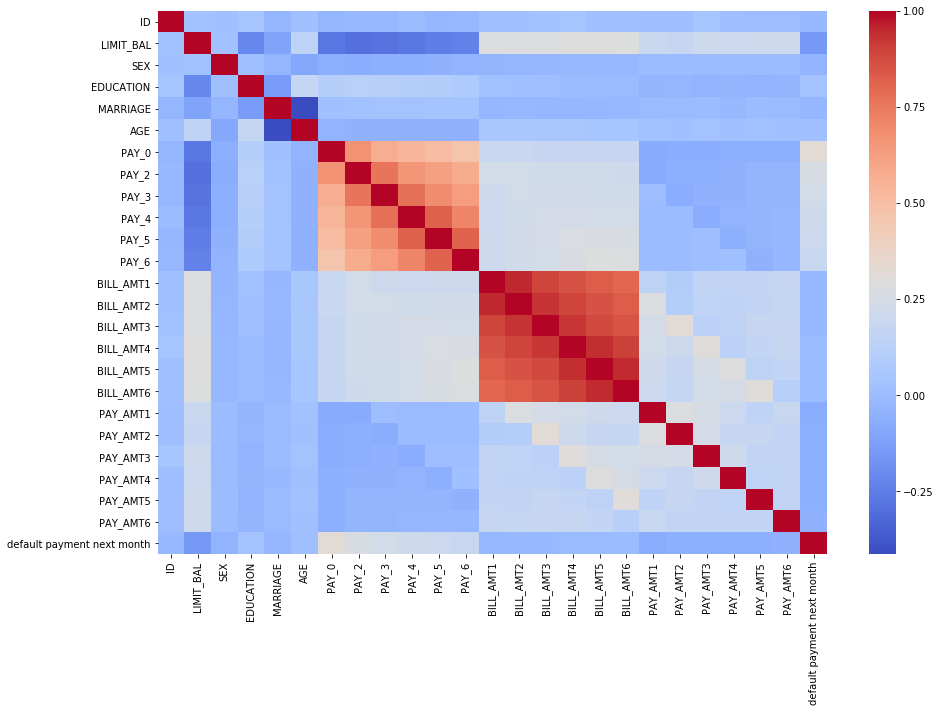

In [10]:
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(credit_card.corr(),cmap = 'coolwarm')

## Solution Statement
Solution for this Classification problem can be Logistic Regression, K-Nearest Neighbors K-NN, Decision Tree Classification, Random Forest Classification, Gradient Boost etc.

For our case we will use classic  Decision Tree Classification & then use ensamble menthod using Random Forest. Entropy and Information Gain are the Mathematical Methods of choosing the best split. 

For Random Forest, we will use many trees with a random sample of features chosen as the split.
- A new random sample of features is chosen for every single tree at every single split.
- For classification, m is typically chosen to be the square root of p.


## Algorithms and Techniques
In the tree we built, every leaf consisted entirely of True inputs or entirely of False inputs.
This means that the tree predicts perfectly on the training data set

Bagging, random forests, and boosting use trees as building blocks to construct more powerful prediction models.

### Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [12]:
X = credit_card.drop(['ID','default payment next month'],axis=1)
y = credit_card['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=805)

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [15]:
predictions = dtree.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.81      0.82      6994
          1       0.40      0.44      0.42      2006

avg / total       0.74      0.73      0.73      9000



In [18]:
print(confusion_matrix(y_test,predictions))

[[5682 1312]
 [1116  890]]


## Benchmark Model

Here we are using Logistic Regression as our Benchmark Model. The Sigmoid Function takes in any value and outputs it to be between 0 and 1.
We can use a confusion matrix to evaluate our model

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
predictions = logmodel.predict(X_test)

In [30]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.78      1.00      0.87      6994
          1       0.00      0.00      0.00      2006

avg / total       0.60      0.78      0.68      9000



C:\Users\asrath\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Project Design
We can use several model to find the best fit for the project, we are using Random Forest from Sklear Ensemble to find out the prediction model if the client will default next month or not.
We have used all features & since its a Random forest model we dont need any scaling of data.


### Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rfc = RandomForestClassifier(n_estimators=600)

In [21]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predictions and Evaluation of Random Forest

Let's predict off the y_test values and evaluate our model.

** Predict default payment next month for the X_test data.**

In [22]:
predictions = rfc.predict(X_test)

In [23]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.95      0.89      6994
          1       0.66      0.38      0.48      2006

avg / total       0.80      0.82      0.80      9000



In [24]:
print(confusion_matrix(y_test,predictions))

[[6612  382]
 [1253  753]]


## Conclusion
Model worked well with Random Forest with a F1 score of .8 , preceision of .8 & recall of .82
We can try Gradient boost & other bossting model to check if that can perform better with our model.